## РК1. Вариант 29. Яровенко Максим, ИУ5Ц-82Б

### 1) Текстовое описание набора данных

Набор данных служит для анализа риска инсульта у населения на основе ряда медицинских данных.

Файл состоит из следующих колонок:
Age - возраст пациента;
Sex - пол пациента;
exang - стенокардия, вызванная физической нагрузкой (1 - да, 0 - нет);
ca - количество крупных судов (0-3);
cp - тип боли в груди (1 - типичная стенокардия, 2 - атипичная стенокардия, 3 - неангинозная боль, 4 - бессимптомный);
trtbps - артериальное давление в покое (в мм. рт. ст.);
chol - холестерин в мг/дл, полученный с помощью датчика ИМТ;
fbs - уровень сахара в крови > 120 мг/дл (1 - да, 0 - нет);
rest_ecg - результаты электрокардиографии в покое (0 - нормальные, 1 - наличие аномалии зубца st-t, 2 - показания вероятной или определенной гипертрофию левого желудочка по критериям Эстеса);
thalach - достигнута максимальная частота сердечных сокращений;
target (0 - малый риск инсульта, 1 - высокий риск инсульта).

### Импорт библиотек

Импортируем библиотеки необходимые для визуального анализа данных.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Загрузка данных

Прочтём данные из скаченного файла с помощью библиотеки Pandas.

In [3]:
data = pd.read_csv('heart.csv', sep=",")

## 2) Основные характеристики датасета

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
data.shape

(1025, 14)

In [6]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [8]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

age - 0
sex - 0
cp - 0
trestbps - 0
chol - 0
fbs - 0
restecg - 0
thalach - 0
exang - 0
oldpeak - 0
slope - 0
ca - 0
thal - 0
target - 0


In [9]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
data['age'].unique()

array([52, 53, 70, 61, 62, 58, 55, 46, 54, 71, 43, 34, 51, 50, 60, 67, 45,
       63, 42, 44, 56, 57, 59, 64, 65, 41, 66, 38, 49, 48, 29, 37, 47, 68,
       76, 40, 39, 77, 69, 35, 74], dtype=int64)

## 3) Визуальное исследование датасета

Построим диаграммы, которые наиболее часто используются при визуальном анализе данных.

#### Диаграмма рассеяния.

Помогает обнаружить визуально наличие зависимости.

<AxesSubplot:xlabel='age', ylabel='oldpeak'>

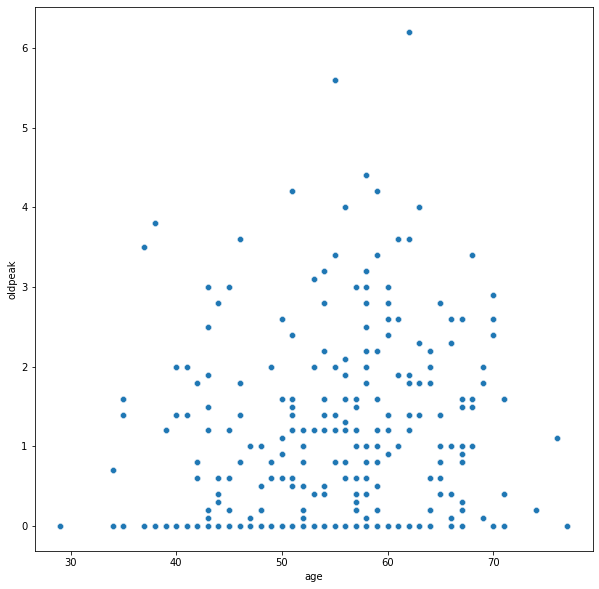

In [15]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(ax=ax, x='age', y='oldpeak', data=data)

График не отображает зависимость между возрастом и уровнем стресса.

### Гистограмма

d:\mo\lab1\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

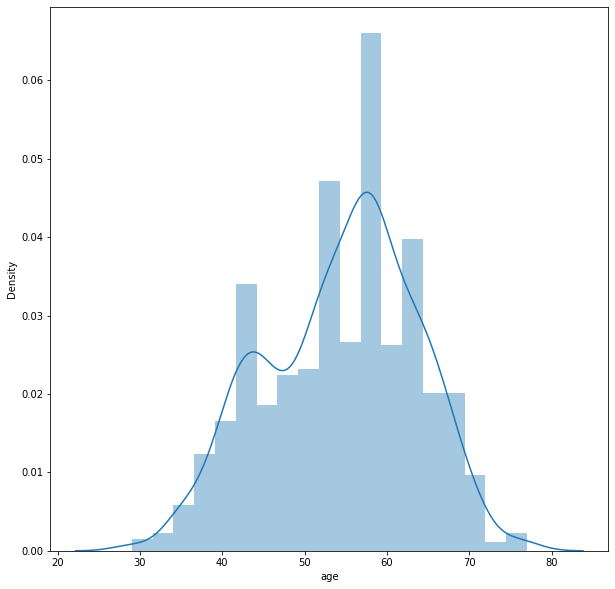

In [22]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['age'])

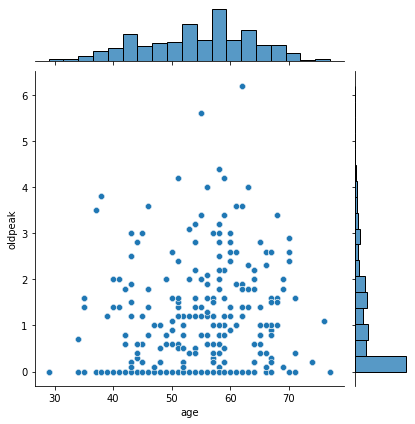

In [24]:
sns.jointplot(x='age', y='oldpeak', data=data)

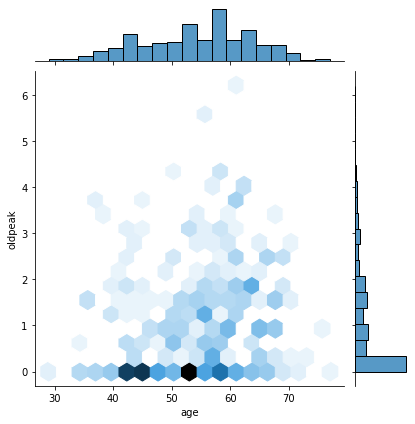

In [25]:
sns.jointplot(x='age', y='oldpeak', data=data,kind="hex")

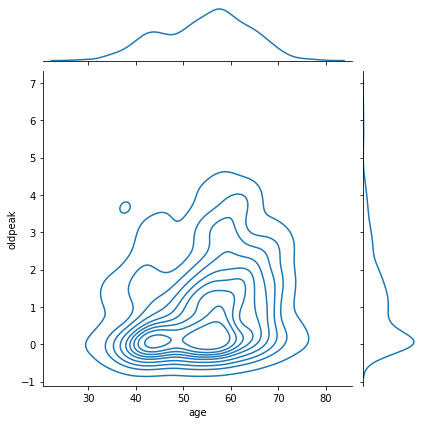

In [26]:
sns.jointplot(x='age', y='oldpeak', data=data,kind="kde")

### Парные диаграммы

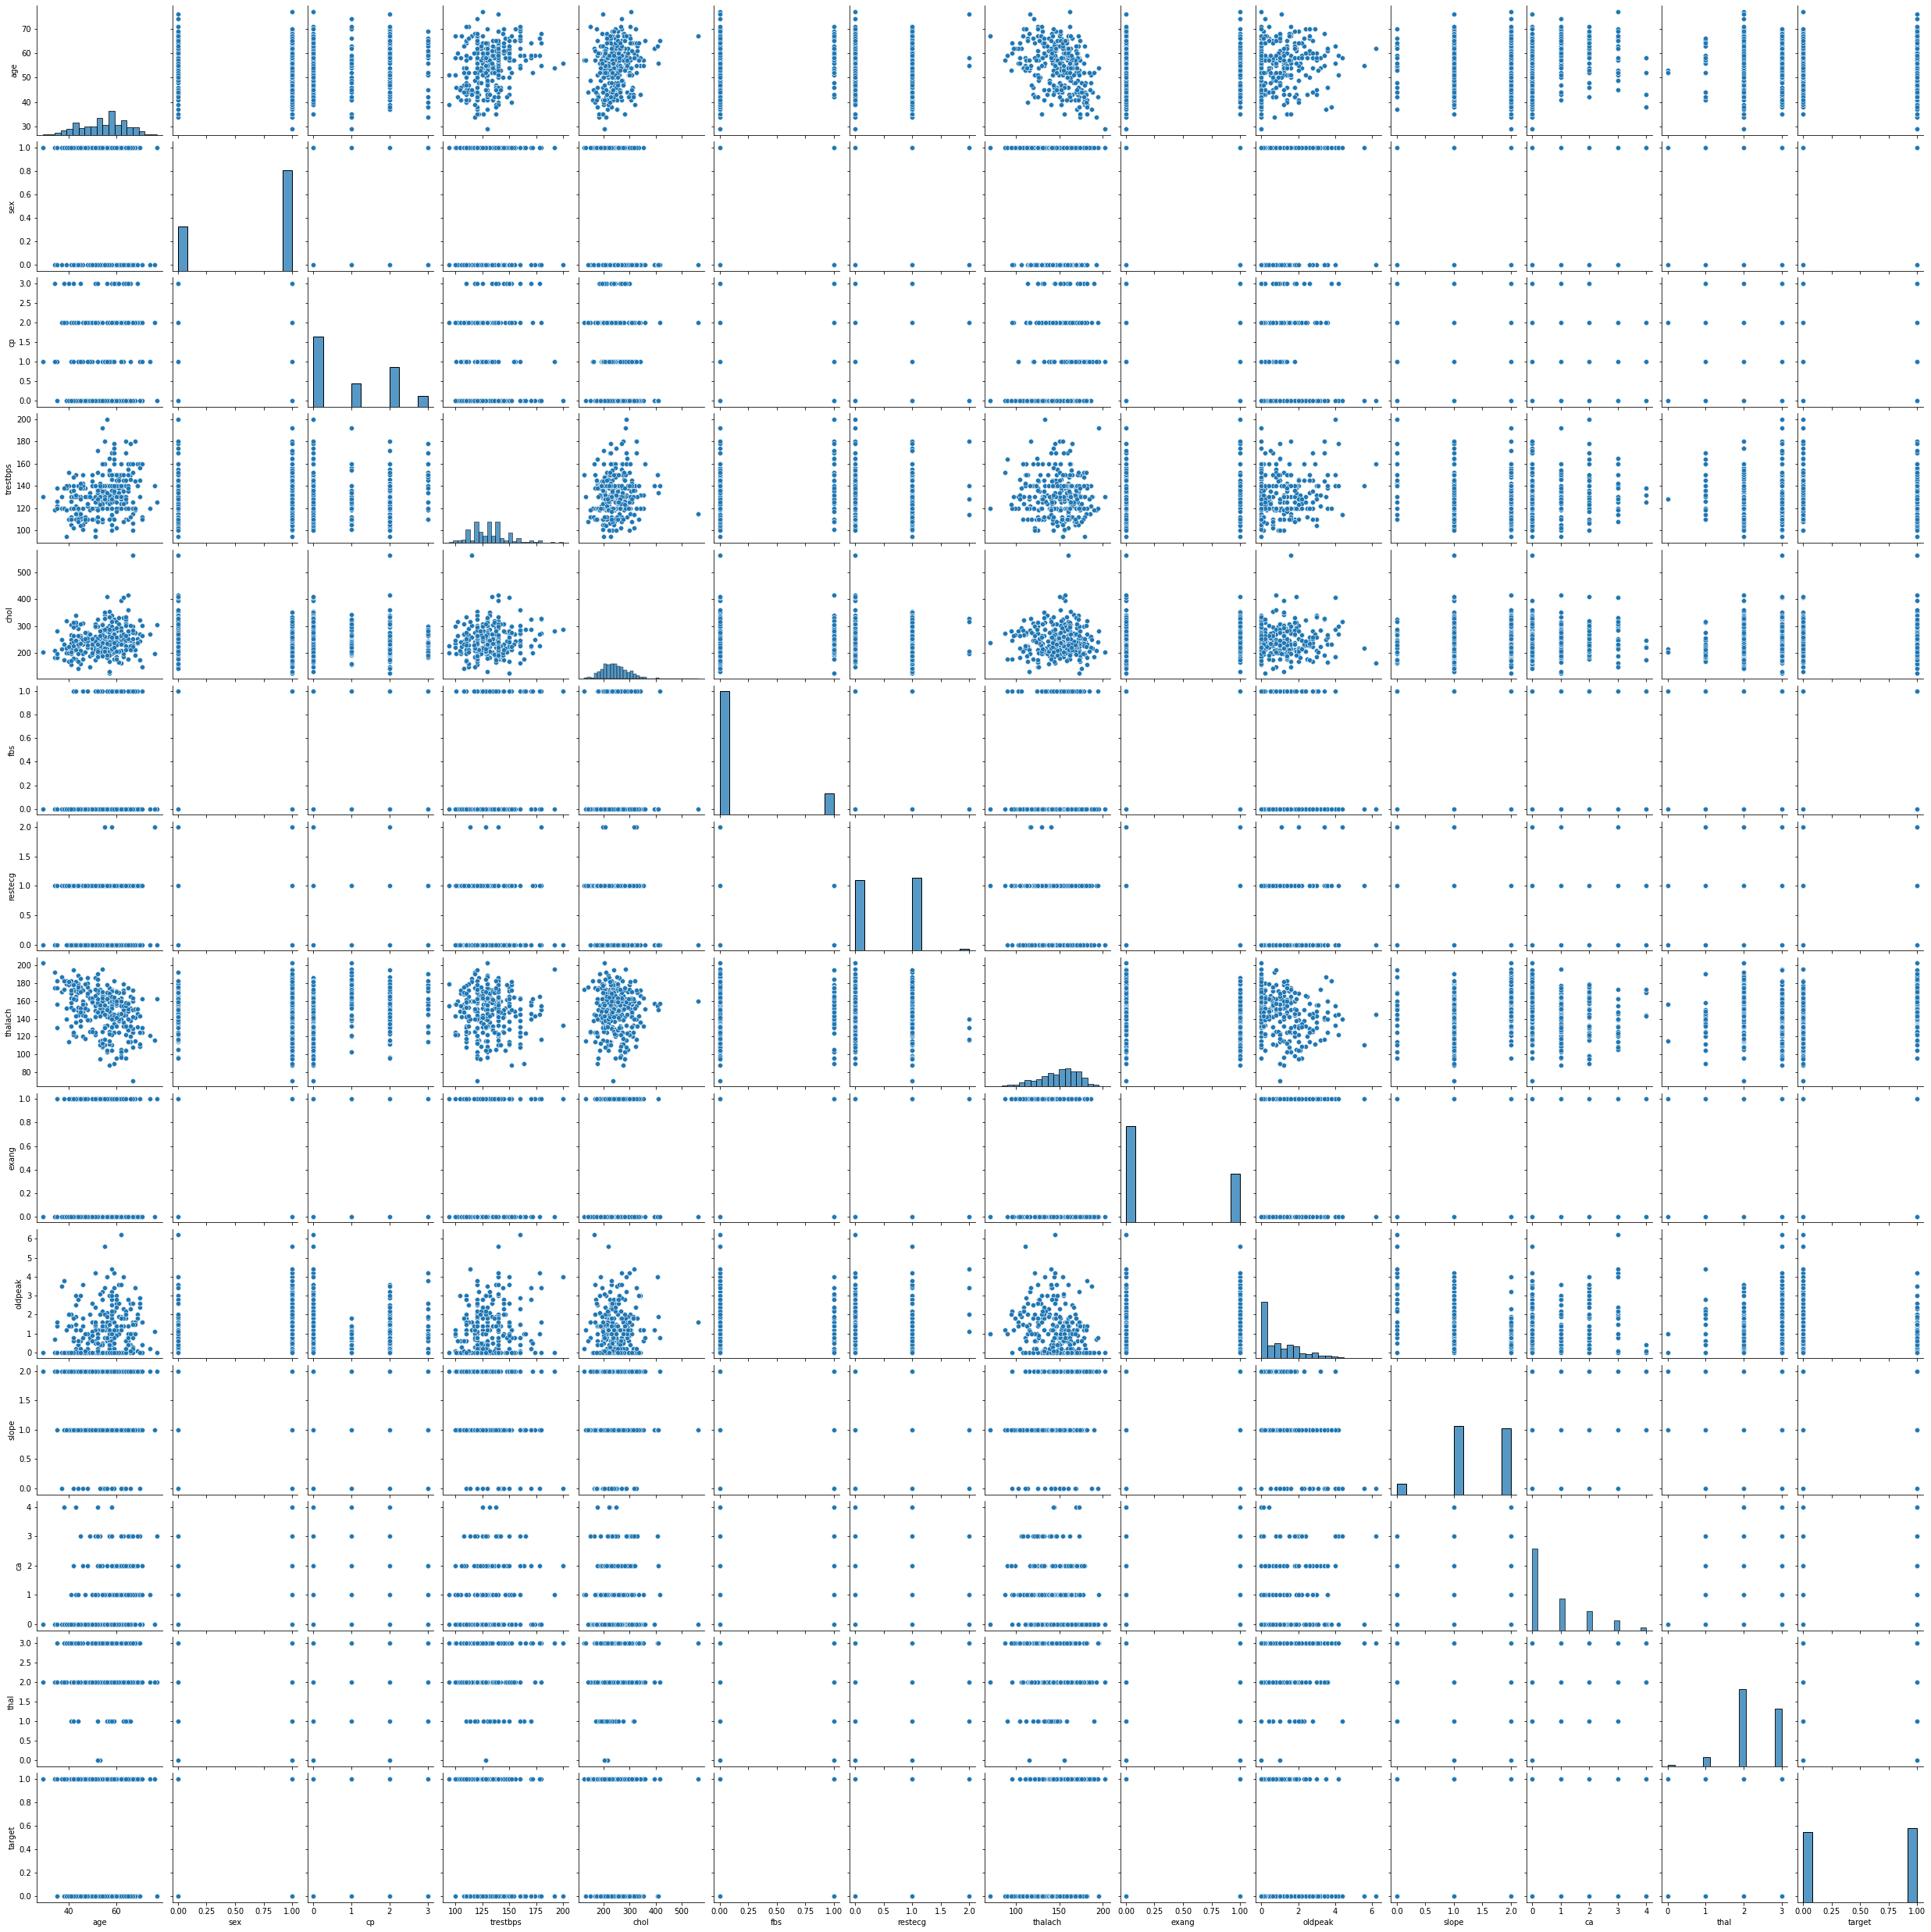

In [27]:
sns.pairplot(data)

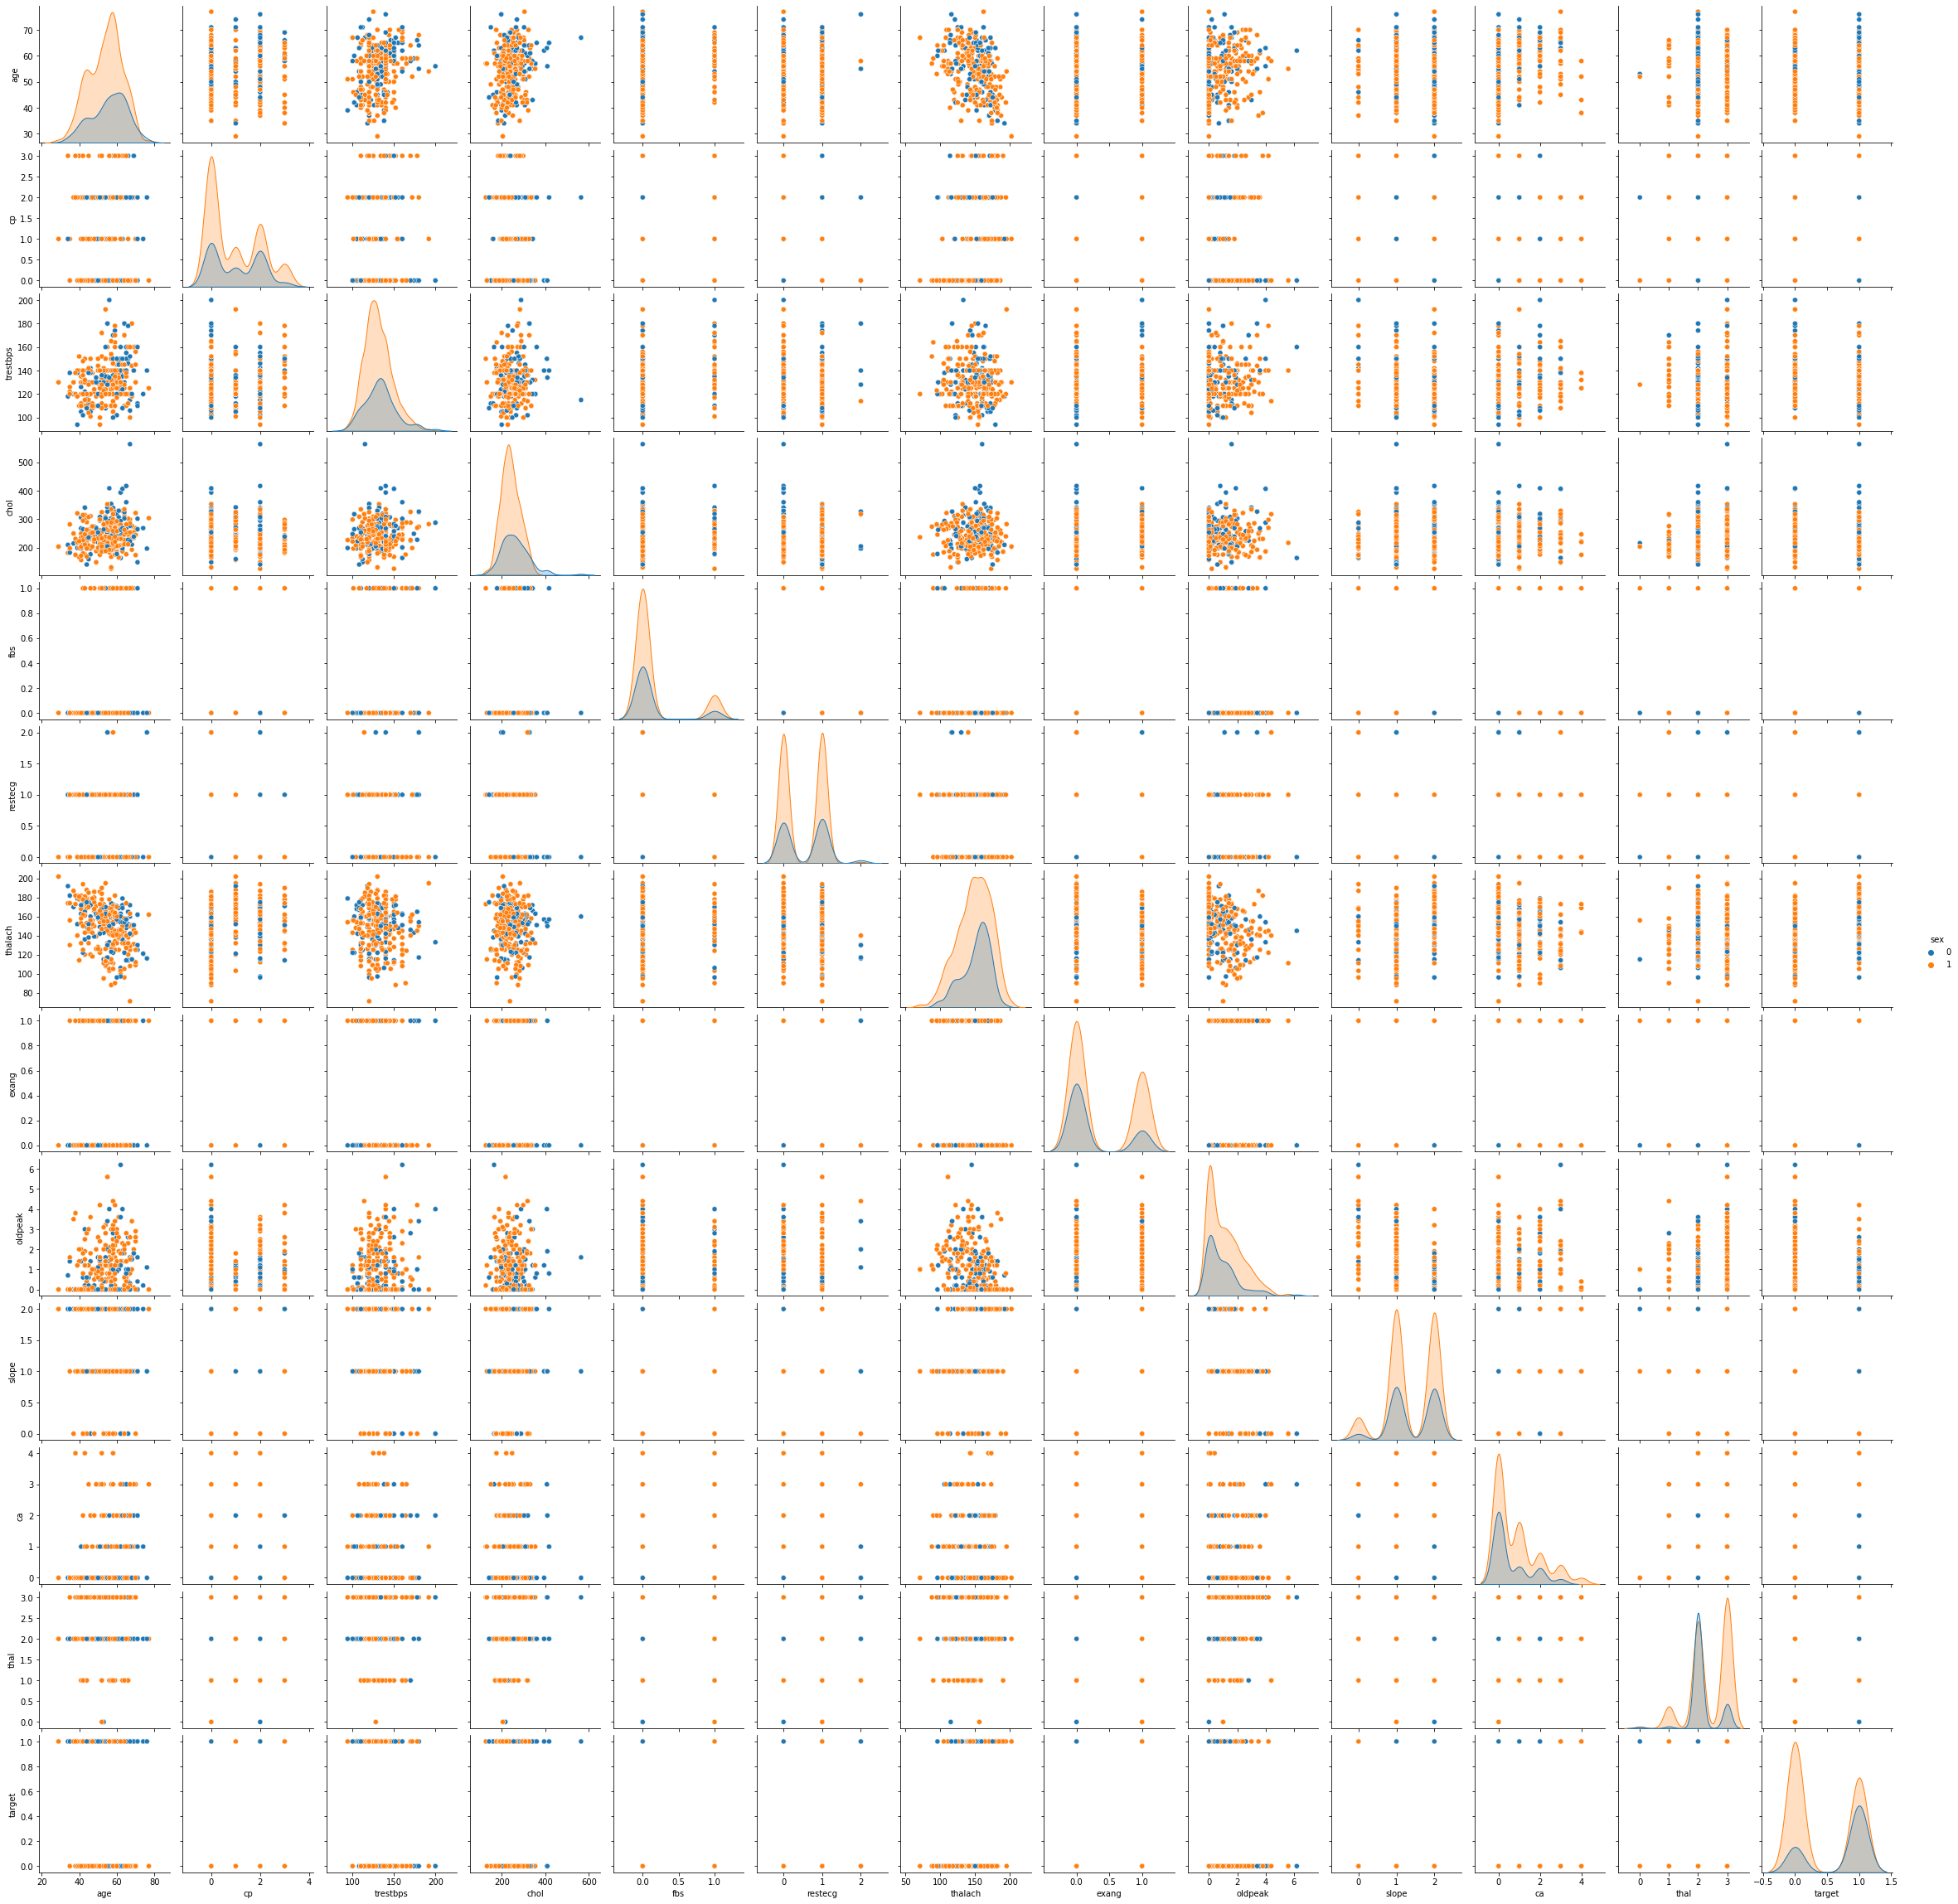

In [28]:
sns.pairplot(data, hue="sex")

### Ящик с усами

<AxesSubplot:xlabel='cp'>

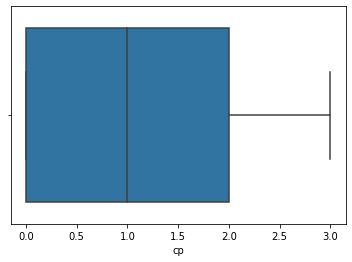

In [36]:
sns.boxplot(x=data['cp'])

<AxesSubplot:ylabel='cp'>

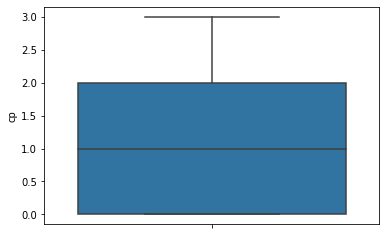

In [32]:
sns.boxplot(y=data['cp'])

<AxesSubplot:xlabel='sex', ylabel='cp'>

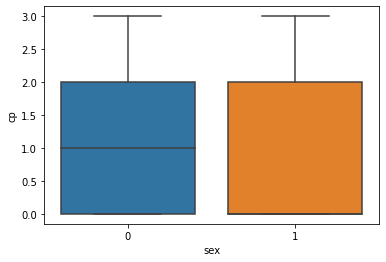

In [34]:
sns.boxplot(x='sex', y='cp', data=data)

<AxesSubplot:xlabel='cp'>

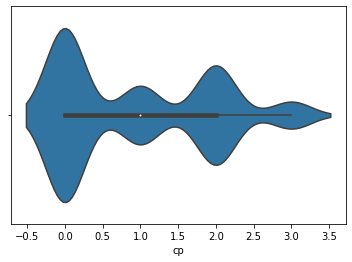

In [38]:
sns.violinplot(x=data['cp'])

d:\mo\lab1\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cp', ylabel='Density'>

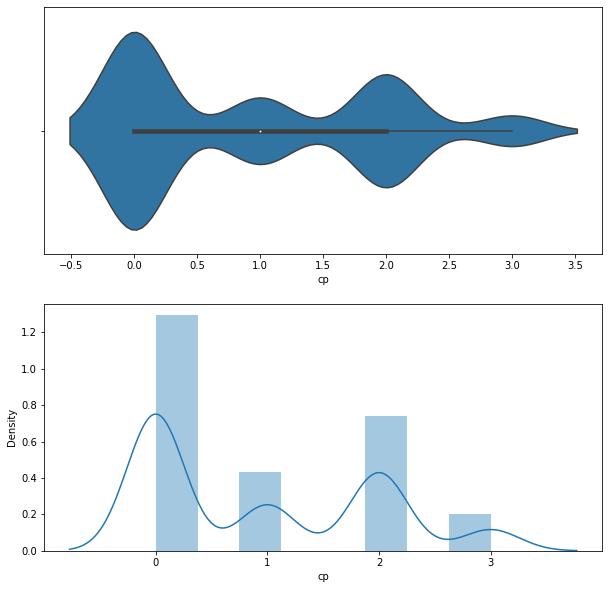

In [40]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['cp'])
sns.distplot(data['cp'], ax=ax[1])

Вывод: в представленном наборе данных содержится потенциал для анализа путем машинного обучения для выявления рисков инсульта у населения.